# Лабораторная работа 3.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binomtest, ttest_ind

## Задание 1.
Загрузить данные из файла data.csv.

In [2]:
df = pd.read_csv(r'data.csv')

df.head(7)

,is_stud,group,sex,work_status,fav_year,visit_freq,usd_pred,random_value
0,Нет,13,М,"Да, неполная ставка",1-2,10,3.31,0.56
1,Нет,другая,Ж,"Да, полная ставка",3-4,8,3.30,0.50
2,Нет,другая,М,"Да, неполная ставка",1-2,1,5.00,0.00
3,Да,13,М,"Да, полная ставка",3-4,6,3.20,0.04
4,Да,12,Ж,Нет,3-4,10,2.00,0.98
5,Да,другая,М,"Да, неполная ставка",1-2,5,3.20,0.66
6,Да,другая,М,Нет,3-4,10,3.30,0.46


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_stud       51 non-null     object 
 1   group         51 non-null     object 
 2   sex           51 non-null     object 
 3   work_status   51 non-null     object 
 4   fav_year      51 non-null     object 
 5   visit_freq    51 non-null     int64  
 6   usd_pred      51 non-null     float64
 7   random_value  51 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 3.3+ KB


In [4]:
df.isna().sum()

is_stud         0
group           0
sex             0
work_status     0
fav_year        0
visit_freq      0
usd_pred        0
random_value    0
dtype: int64

## Задание 2.

Визуализировать данные таблицы, рассчитать некоторые базовые
статистики. Дать описание используемых в п.3-п.4 данных (например,
кол-во студентов в группах, кол-во по полу, доля работающих в
группах и т.п.)

In [5]:
df.describe()

,visit_freq,usd_pred,random_value
count,51.000000,51.000000,51.000000
mean,6.627451,3.478459,0.600816
std,2.591994,0.468136,0.314528
min,1.000000,2.000000,0.000000
25%,5.000000,3.300000,0.450000
50%,7.000000,3.400000,0.640000
75%,8.000000,3.575000,0.880000
max,10.000000,5.000000,0.990000


In [6]:
for col in ['is_stud', 'work_status']:
    df[col] = [True if a[0] == 'Да' else False for a in df[col].str.split(',')]

df.head(7)

,is_stud,group,sex,work_status,fav_year,visit_freq,usd_pred,random_value
0,False,13,М,True,1-2,10,3.31,0.56
1,False,другая,Ж,True,3-4,8,3.30,0.50
2,False,другая,М,True,1-2,1,5.00,0.00
3,True,13,М,True,3-4,6,3.20,0.04
4,True,12,Ж,False,3-4,10,2.00,0.98
5,True,другая,М,True,1-2,5,3.20,0.66
6,True,другая,М,False,3-4,10,3.30,0.46


In [7]:
students = pd.DataFrame(data=df[df['is_stud']])
dict_stud = students['group'].value_counts()

print('Количество студентов по группам:\n', dict_stud)

Количество студентов по группам:
 group
12        22
другая    17
13         7
Name: count, dtype: int64


In [8]:
print('Количество студентов по полу:\n', students['sex'].value_counts())

Количество студентов по полу:
 sex
М    30
Ж    16
Name: count, dtype: int64


In [9]:
df_working_students = pd.DataFrame(data=df['group'].unique(), columns=['group'])
df_working_students['ratio'] = 0.0 

for key in dict_stud.keys():
    ratio = students[(students['work_status']) & (students['group'] == key)]['group'].count() / students[students['group'] == key]['group'].count()
    df_working_students.loc[df_working_students['group'] == key, 'ratio'] = ratio
    
    print(f'Доля работающих студентов в {key} группе: {ratio}')

Доля работающих студентов в 12 группе: 0.5
Доля работающих студентов в другая группе: 0.5294117647058824
Доля работающих студентов в 13 группе: 0.7142857142857143


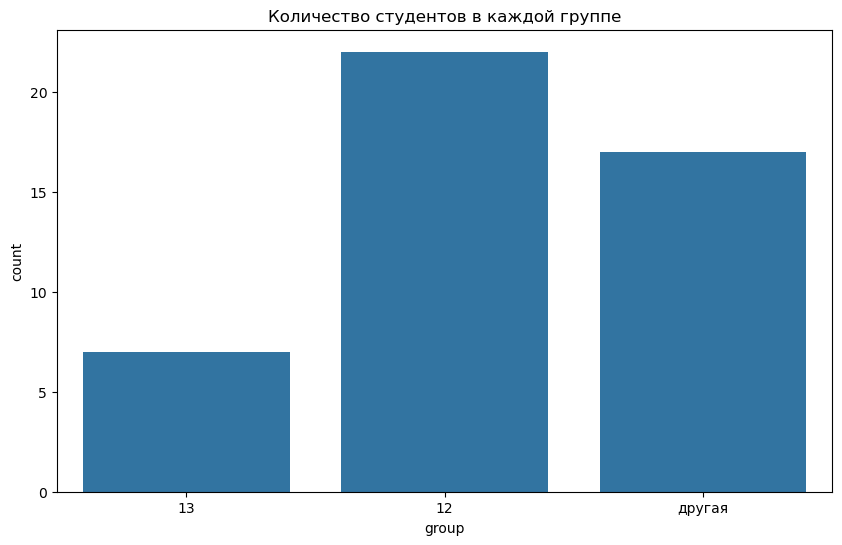

In [10]:
plt.figure(figsize=(10,6))

sns.countplot(x='group', data=students)

plt.title('Количество студентов в каждой группе')
plt.show()

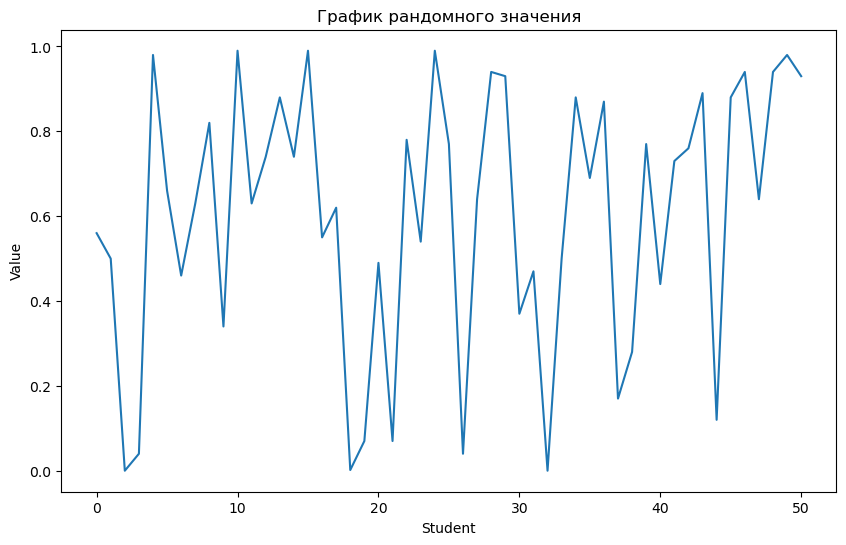

In [11]:
plt.figure(figsize=(10,6))

plt.plot(df['random_value'])
plt.xlabel('Student')
plt.ylabel('Value')
plt.title('График рандомного значения')

plt.show()

In [12]:
df['fav_year_split'] = [int(a[0]) for a in df['fav_year'].str.split('-')]

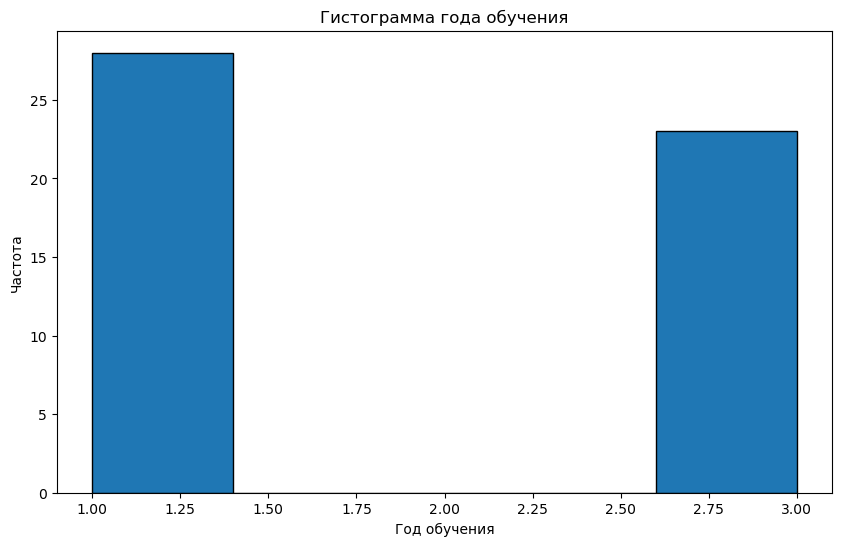

In [13]:
plt.figure(figsize=(10, 6))

plt.hist(df['fav_year_split'], bins=5, edgecolor='black')
plt.xlabel('Год обучения')
plt.ylabel('Частота')
plt.title('Гистограмма года обучения')
plt.show()

## Задание 3.

Выдвинуть 2 гипотезы относительно влияния фактора на бинарную
метрику. С помощью Биномиального теста (логику теста реализовать
самому) проверить гипотезы, дать интерпретацию полученных
результатов.

In [14]:
def factorial(n):
    if n == 0:
        return 1
    
    return n * factorial(n - 1)

def binomial_coefficient(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))

def binomial_test(observed_successes, total_trials, hypothesized_prob):
    p_value = 0
    
    for k in range(observed_successes, total_trials + 1):
        p_value += binomial_coefficient(total_trials, k) * (hypothesized_prob ** k) * ((1 - hypothesized_prob) ** (total_trials - k))
    
    return p_value

### Гипотеза 1

Предположим, что каждый студент с некоторой вероятностью $p_1$приходит на занятие.

Студентов можно разделить на 2 группы по половому признаку.
$X_1$ – мужчины, $X_2$ – женщины.

Хотим проверить, одинакова ли частота посещения пар среди групп.
$H_0:p_1=p_2.$

Предположим, что у нас было 100 наблюдений.

In [15]:
students['visit_freq'] = students['visit_freq'] / 10

students.head(7)

,is_stud,group,sex,work_status,fav_year,visit_freq,usd_pred,random_value
3,True,13,М,True,3-4,0.6,3.2,0.04
4,True,12,Ж,False,3-4,1.0,2.0,0.98
5,True,другая,М,True,1-2,0.5,3.2,0.66
6,True,другая,М,False,3-4,1.0,3.3,0.46
7,True,другая,Ж,True,1-2,0.6,3.9,0.63
8,True,12,Ж,True,1-2,0.8,5.0,0.82
10,True,12,Ж,False,3-4,0.7,3.8,0.99


In [16]:
p1, p2 = np.mean(students[students['sex']=='М']['visit_freq']), np.mean(students[students['sex']=='Ж']['visit_freq'])

total_trials = 100
observed_successes = int(p2 * total_trials)

print('p-value: ', binomial_test(observed_successes, total_trials, p1))
print('Встроенный биномиальный тест: ', binomtest(observed_successes, total_trials, p1, alternative='greater').pvalue)

p-value:  0.03015645269049514
Встроенный биномиальный тест:  0.030156452690495154


### Гипотеза 2.

Предположим, что каждый студент не принадлежит ни 12, ни 13 группе с вероятностью p1.

Студентов можно разделить на 2 группы по половому признаку.
$X_1$ – работающие, $X_2$ – не работающие.

Хотим проверить, одинакова ли вероянтность того, что студент работает, среди групп.
$H_0:p_1=p_2.$

In [17]:
p1 = students[(students['work_status']) & (students['group'] == 'другая')]['group'].count() / students[students['group'] == 'другая']['group'].count() 
p2 = students[(students['work_status'] == False) & (students['group'] == 'другая')]['group'].count() / students[students['group'] == 'другая']['group'].count()

total_trials = students[students['group'] == 'другая']['group'].count()
observed_successes = int(p2 * total_trials)

print('p-value: ', binomial_test(observed_successes, total_trials, p1))
print('Встроенный биномиальный тест: ', binomtest(observed_successes, total_trials, p1, alternative='greater').pvalue)

p-value:  0.7670773734713453
Встроенный биномиальный тест:  0.7670773734713454


## Задание 4. 
Выдвинуть 2 гипотезы относительно влияния фактора на непрерывную
метрику. С помощью t-критерия Стьюдента проверить гипотезы, дать
интерпретацию полученных результатов.
### Гипотеза 1 
$H_0:$ средние значения столбца usd_pred не различаются в зависимости от того, работает человек или нет.

In [18]:
group1 = df[df['work_status']]['usd_pred'].astype(float)
group2 = df[df['work_status'] == False]['usd_pred'].astype(float)

t_stat, p_val = ttest_ind(group1, group2)

print("t-статистика:", t_stat)
print("p-значение:", p_val)

t-статистика: 0.7856462774268993
p-значение: 0.4358574033704037


### Гипотеза 2
$H_0:$ средние значения столбца random_value не различаются в зависимости от того, какой год обучения для студента был любимым.

In [19]:
group1 = df[df['fav_year'] == '1-2']['random_value'].astype(float)
group2 = df[df['fav_year'] == '3-4']['random_value'].astype(float)

t_stat, p_val = ttest_ind(group1, group2)

print("t-статистика:", t_stat)
print("p-значение:", p_val)

t-статистика: 0.4783168678440111
p-значение: 0.6345519778186559
